# ****FLUSHING ANALYTICS****


# Installing Dependencies

In [106]:
# %pip install pandas
# %pip install pyproj
# %pip install scikit-learn
# %pip install openpyxl
# %pip install matplotlib
# %pip install seaborn

In [107]:
# %pip install xgboost
# %pip install optuna

# Preparing the Data

## Loading and exploring the datasets

In [108]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from pyproj import Proj, transform

# file_path = '/EllaTesting/Files/Repairs_2018_2023.xlsx'

# print(file_path)

# Creating DataFrames from spreadsheets
all_hydrants_filepath = "Qry_AllHY.csv"
flushing_history_filepath = "Qry_FlushHistory.csv"

all_hydrants_df = pd.read_csv(all_hydrants_filepath)
flushing_history_df = pd.read_csv(flushing_history_filepath)

C:\Users\26154\AppData\Local\Temp\1\ipykernel_23712\881486883.py:20: DtypeWarning: Columns (33,50,57,91) have mixed types. Specify dtype option on import or set low_memory=False.
  all_hydrants_df = pd.read_csv(all_hydrants_filepath)
C:\Users\26154\AppData\Local\Temp\1\ipykernel_23712\881486883.py:21: DtypeWarning: Columns (0,4,5,15,23,24,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  flushing_history_df = pd.read_csv(flushing_history_filepath)


## Data Cleaning and Preprocessing

### Data Cleaning - History Table

In [109]:
# Creating a copy of the Flushing History DataFrame
copied_flushing_history_df = copy.deepcopy(flushing_history_df)

In [110]:
#delete all unnecessary columns
copied_flushing_history_df = copied_flushing_history_df.drop(columns={'FLSHTIME3', 'FLSHTIME4', 'FLSHTIME5', 'FLSHTIME6', 'FLSHTIME7', 'FLSHTIME8', 'FLSHTIME9', 'FLSHTIME10', 'FLSHTIME11', 'FLSHVOL1', 'FLSHVOL2', 'FLSHVOL3', 'FLSHVOL4', 'FLSHVOL5', 'FLSHVOL6', 'FLSHVOL7', 'FLSHVOL8', 'FLSHVOL9', 'FLSHVOL10', 'FLSHVOL11', 'CLFREE3', 
                                                                      'CLFREE4', 'CLFREE5', 'CLFREE6', 'CLFREE7', 'CLFREE8', 'CLFREE9', 'CLFREE10', 'CLFREE11', 'CLTOTL3', 'CLTOTL4', 'CLTOTL5', 'CLTOTL6', 'CLTOTL7', 'CLTOTL8', 'CLTOTL9', 'CLTOTL10', 'CLTOTL11', 'ADDBY', 'ADDDTTM', 'MODBY', 'MODDTTM', 'REMARKS', 'FLSHTIME', 'FLUSHNC', 'NFREASON',  
                                                                      'CLTOTL1', 'CLTOTL2', 'CLTOTL', 'UNSCEHDLD',  'ALTERNATE'})

#### Inspecting the data

In [111]:
copied_flushing_history_df.shape

(116808, 16)

In [112]:
copied_flushing_history_df = copied_flushing_history_df.dropna(subset=['FLSHFRE', 'FLSHDATE', 'CLFREE', 'PHREAD', 'FLSHVOL', 'FLSHDUR', 'COMPKEY'])

In [113]:
copied_flushing_history_df.shape

(112606, 16)

In [114]:
copied_flushing_history_df.head(10)

,INSPKEY,GRIDKEY,FLSHFRE,FLSHDATE,CLFREE,PHREAD,FLSHVOL,FLSHDUR,INSPBY,CLFREE1,CLFREE2,WWNUM,COMMUN,COMPKEY,FLSHTIME1,FLSHTIME2
6,965966,19046430,1 WEEK,2019-04-23,1.18,7.92,1.000,5.0,61535,NaN,NaN,WW220003993,CD,805425.0,NaN,NaN
7,972209,19048814,1 MONTH,2019-04-25,1.66,7.90,18.000,10.0,65673,1.67,NaN,WW220003993,CV,9876.0,15:05,NaN
8,972253,19048815,1 MONTH,2019-04-25,1.33,7.51,10.000,10.0,65673,1.30,NaN,WW260002590,CR,540642.0,09:55,NaN
9,965951,19048816,1 WEEK,2019-04-29,1.69,7.50,6.000,5.0,65673,NaN,NaN,WW260002590,CT,531455.0,NaN,NaN
10,965955,19048817,2 WEEKS,2019-04-30,1.67,7.86,10.000,10.0,65673,1.64,NaN,WW220003993,CV,541072.0,10:50,NaN
11,965950,19048818,1 WEEK,2019-04-30,0.72,8.09,23.000,15.0,65673,0.77,0.82,WW260094120,CB,528297.0,09:40,09:45
12,970581,19048819,2 WEEKS,2019-05-01,1.09,8.21,1.000,5.0,61535,NaN,NaN,WW260094120,CB,9986.0,NaN,NaN
13,970575,19048820,2 WEEKS,2019-05-01,1.11,8.31,1.000,5.0,61535,NaN,NaN,WW260094120,CCC,9263.0,NaN,NaN
14,965730,19048821,3 DAYS,2019-03-01,0.92,7.69,1.194,20.0,35832,NaN,NaN,WW260094120,B,7781.0,NaN,NaN
15,965730,19048822,3 DAYS,2019-04-30,0.42,7.89,5.000,13.0,68527,0.71,NaN,WW260094120,B,7781.0,07:40,NaN


In [115]:
copied_flushing_history_df.to_csv('historycheck.csv', index=False)

**Imputing Missing Categorical Values**

In [116]:
#TODO: Ayan: Use the COMPKEY to fill out the missing values in COMMUN
# Sorting the DataFrame by COMPKEY, as there is a pattern between COMPKEY values and COMMUN values
copied_flushing_history_df = copied_flushing_history_df.sort_values('COMPKEY')

# Imputing every missing value with the value that came before it in the sorted DataFrame
copied_flushing_history_df['COMMUN'] = copied_flushing_history_df['COMMUN'].ffill()

**Imputing Missing Numerical Values**

In [117]:
# Imputing missing values in the FLSHVOL and FLSHDUR columns with the median of the column
copied_flushing_history_df['FLSHVOL'] = copied_flushing_history_df['FLSHVOL'].fillna(copied_flushing_history_df['FLSHVOL'].median())
copied_flushing_history_df['FLSHDUR'] = copied_flushing_history_df['FLSHDUR'].fillna(copied_flushing_history_df['FLSHDUR'].median())

**Detecting and Replacing Outliers**

In [118]:
# For visualizing the box and whisker plot
import seaborn as sns

# Replaces all outliers within a given column with the median of that column
def replace_outliers(df, column):
    # Creates a box and whisker plot to visualize data points that are considered to be outliers
    sns.boxplot(df[column])
    plt.title(f"Original Box and Whisker Plot for {column}")
    plt.show()
    
    # Computing the first, second (median), and third quartiles
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.5)
    q3 = df[column].quantile(0.75)

    print(f"First quartile is {q1}")
    print(f"Median is {q2}")
    print(f"Third quartile is {q3}")
    
    # Computing the interquartile range
    iqr = q3 - q1

    # Values that are lower than the lower fence or higher than the upper fence are considered to be outliers
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)

    print(f"Lower fence is {lower_fence}")
    print(f"Upper fence is {upper_fence}")

    # Replace outliers with the median
    adjusted_column = [x if lower_fence <= x <= upper_fence else q2 for x in df[column]]
    
    # New box and whisker plot with outliers adjusted
    sns.boxplot(adjusted_column)
    plt.title(f"New Box and Whisker Plot for {column}")
    plt.show()

    return adjusted_column

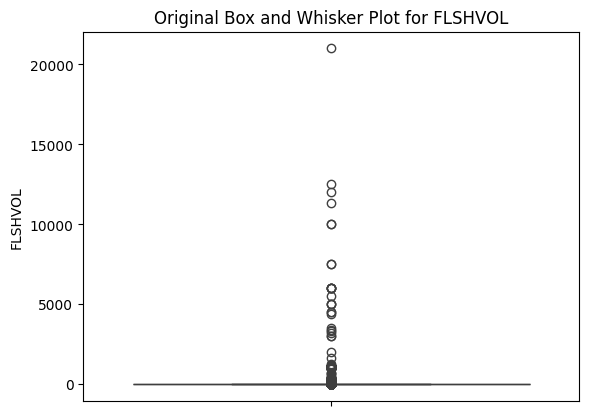

First quartile is 5.0
Median is 10.0
Third quartile is 18.0
Lower fence is -14.5
Upper fence is 37.5


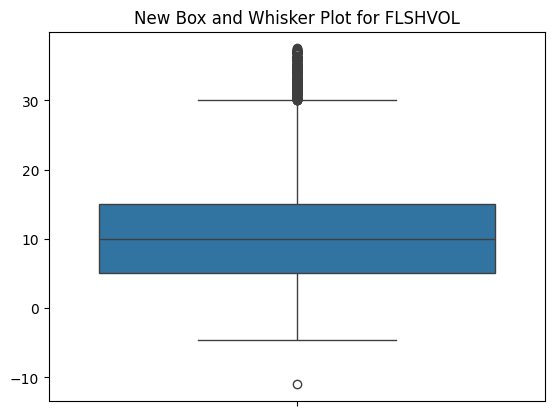

In [119]:
# Replacing outliers in the FLSHVOL column
copied_flushing_history_df['FLSHVOL'] = replace_outliers(copied_flushing_history_df, 'FLSHVOL')

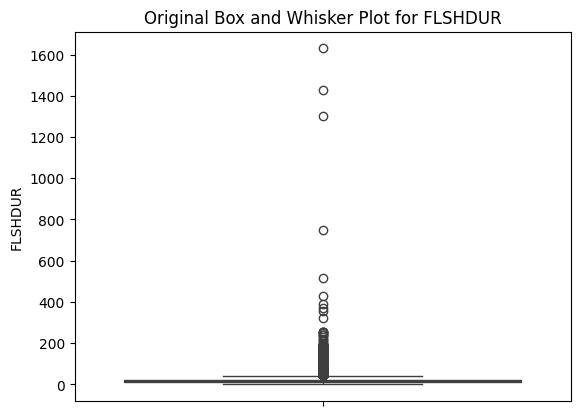

First quartile is 10.0
Median is 15.0
Third quartile is 23.0
Lower fence is -9.5
Upper fence is 42.5


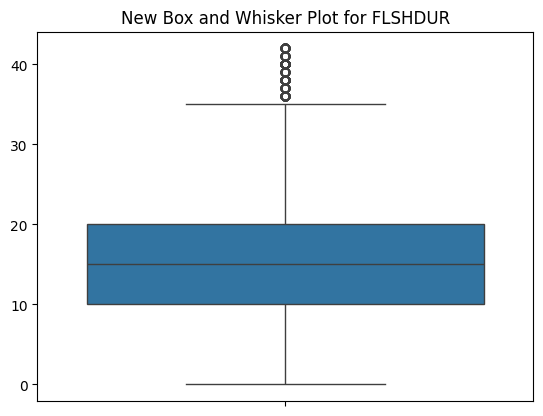

In [120]:
# Replacing outliers in the FLSHDUR column
copied_flushing_history_df['FLSHDUR'] = replace_outliers(copied_flushing_history_df, 'FLSHDUR')

### Data Cleaning - Hydrant Table

In [121]:
# Creating a copy of the All Hydrants DataFrame
copied_all_hydrants_df = copy.deepcopy(all_hydrants_df)

In [122]:
# Filters rows where flushing frequency is blank
copied_all_hydrants_df = copied_all_hydrants_df[copied_all_hydrants_df['FLSHFRE'].notnull()]
copied_all_hydrants_df.describe()

,ADDRKEY,AUXVALVE,BARRELSIZE,IMSRO_COMPHY_COMPKEY,COMPLEXKEY,FEEDERDIAM,FEEDERLEN,GISSTATIC,HT,INTKEY,...,EMASSTCRTL,EMASSTCRDT,EMASSTRISK,EMASTRSKDT,EMDISTRICT,EMEQPMNTCL,EMEQPMNTTP,EMASSTDESC,EMCOND,EMCONDDATE
count,2389.000000,0.0,2389.0,2.389000e+03,2389.0,2389.000000,2389.000000,0.0,2389.0,2389.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,81076.322729,NaN,0.0,3.362129e+05,1.0,63.729594,4.024884,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,122051.138142,NaN,0.0,4.165480e+05,0.0,74.163875,29.154112,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1003.000000,NaN,0.0,1.002000e+03,1.0,0.000000,0.000000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3243.000000,NaN,0.0,9.067000e+03,1.0,0.000000,1.200000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5478.000000,NaN,0.0,1.939500e+04,1.0,0.000000,2.291000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,129011.000000,NaN,0.0,7.158620e+05,1.0,150.000000,3.500000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,437401.000000,NaN,0.0,1.312755e+06,1.0,150.000000,1166.540000,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# Dropping unnecessary columns
copied_all_hydrants_df = copied_all_hydrants_df.drop(columns={'ADDRKEY', 'ADDRQUAL', 'AUXVALVE', 'BARRELSIZE', 'COMPLEXKEY', 'GISSTATIC', 'HT', 'INTKEY', 'MAPNO', 'OBST', 'OUTLSZ4', 'PACKING', 'PAINTTYPE', 'PRCLKEY', 'SEGKEY', 'SERNO', 'SLKEY', 'SPECINST', 'STKEY', 'WVKEY', 'BGTNO', 'USGAREAKEY', 'EXPBY', 'EXPDATE', 'ADDBY', 'MODBY', 'MODDTTM',
                                                              'LASTINSP', 'LASTWINT', 'OLDID', 'WMODID', 'MUNICIPAL', 'FLUDATE', 'WWNUM', 'LASTFREE', 'LASTOTAL', 'FLSHFRE_GIS', 'MINFLTM', 'AVKCLIP', 'ASUMDATE', 'MAINTBY', 'REPLABY', 'REPLAFOR', 'FRFLWVLDDT', 'ASSTGRPID', 'EMDEPT', 'EMDIV', 'EMSERV', 'EMSERVCAT', 'EMCAMASTCL', 'EMASSTPRNT', 'EMPURCHDAT',
                                                                  'EMESTSRVLF', 'EMRMGSRVLF', 'EMRMSRLFDT', 'EMREPLCOST', 'EMREPCOSDT', 'EMPURINCST', 'EMASSTCRTL', 'EMASSTCRDT', 'EMASSTRISK', 'EMASTRSKDT', 'EMDISTRICT', 'EMEQPMNTCL', 'EMEQPMNTTP', 'EMASSTDESC', 'EMCOND', 'EMCONDDATE', 'OWN', 'SERVSTAT', 'DISTRICT', 'ASBLT', 'WATPLATT',
                                                                  'LSTFMAX1',	'LSTFMAX2',	'LSTFMAX3',	'AVE3FMAX',	'LSTTMAX1',	'LSTTMAX2',	'LSTTMAX3',	'AVE3TMAX', 'ASBLT', 'ZCOORD', 'PRESSMIN',	'PRESSMAX',	'FIRFLGPM',	'OUTELEVN',	'MDLRESRD', 'FEEDERTYPE'})

In [124]:
# Filtering out invalid values
# copied_all_hydrants_df = copied_all_hydrants_df[copied_all_hydrants_df['OWN'].isin(['R', 'NAMP'])]
# copied_all_hydrants_df = copied_all_hydrants_df[copied_all_hydrants_df['SERVSTAT'].isin(['A', 'ANYR'])]
# copied_all_hydrants_df = copied_all_hydrants_df[copied_all_hydrants_df['EXPDATE'].isnull()]

**Imputing Missing Categorical Values**

In [125]:
# Item 3: Clean data, replace nulls with values in some columns
copied_all_hydrants_df['UNITTYPE'] = copied_all_hydrants_df['UNITTYPE'].fillna('STDHY')

In [126]:
copied_all_hydrants_df['UNITTYPE'].describe()

count       2389
unique         2
top       HYBLWF
freq        2350
Name: UNITTYPE, dtype: object

In [127]:
copied_all_hydrants_df.to_csv('hydrantcheck.csv', index=False)

In [128]:
#TODO: Ayan: Imputing the missing data for PRESZONE
# Based on other rows with similar data as the missing rows in PRESZONE, PG8 is the most suitable value to impute here
copied_all_hydrants_df['PRESZONE'] = copied_all_hydrants_df['PRESZONE'].fillna("PG8")

In [129]:
#TODO: Ayan: Imputation for DECLREQD
# Replacing blank values in the 'DECLREQD' column with the mode of the column
copied_all_hydrants_df['DECLREQD'] = copied_all_hydrants_df['DECLREQD'].fillna(copied_all_hydrants_df['DECLREQD'].mode().iloc[0])

In [130]:
#TODO: Ella: Convert null to N for HYMARKER
copied_all_hydrants_df['HYMARKER'] = copied_all_hydrants_df['HYMARKER'].fillna('N')

In [131]:
#TODO: Ayan: Impute the missing value for NONSCHE
copied_all_hydrants_df['NONSCHE'] = copied_all_hydrants_df['NONSCHE'].fillna(copied_all_hydrants_df['NONSCHE'].mode().iloc[0])

In [132]:
copied_all_hydrants_df.head()

,AREA,COLOR,IMSRO_COMPHY_COMPKEY,FEEDERDIAM,FEEDERLEN,INSTDATE,LOC,MAINKEY,MFGKEY,MODELNO,...,ADDDTTM,FLSHFRE,LONGKEY,PLUGGED,COMMUN,NONSCHE,FZONENUM,DECLREQD,WARDID,HYMARKER
65,B31,BLUE,1673,0.0,1.4,NaN,1031,526297,1012,CENTURY,...,2003-03-01,1 YEAR,N,N,B,N,FZ-C01,N,B02,Y
76,B31,BLUE,1696,0.0,1.1,NaN,1145,754390,1022,M67,...,2003-03-01,1 YEAR,N,N,B,N,FZ-C01,Y,B02,N
126,B31,BLUE,2847,0.0,1.1,NaN,1058,762853,1012,CENTURY,...,2003-03-01,1 YEAR,N,N,B,N,FZ-C01,N,B02,N
138,B06,ORANGE,2863,0.0,3.0,NaN,0641,512055,1009,D67M,...,2003-03-01,1 YEAR,N,N,B,N,FZ-C03,N,B04,N
139,B12,BLUE,2864,0.0,1.0,NaN,0821,716655,1022,M59M,...,2003-03-01,1 YEAR,N,N,B,N,FZ-C03,Y,B07,N


**Binning**

In [133]:
#TODO: Jordan: Imputing the missing data for SUBAREA
#TODO: Jordan: What are the differences between AREA, SUBAREA, COMMUN, WARDID. Which columns to keep and why?

subarea_mode = copied_all_hydrants_df['SUBAREA'].mode()[0]
copied_all_hydrants_df['SUBAREA'] = copied_all_hydrants_df['SUBAREA'].fillna(subarea_mode)
print(copied_all_hydrants_df['SUBAREA'].isna().sum())

# Extracting only the letters from the AREA column
copied_all_hydrants_df['Letters'] = copied_all_hydrants_df['AREA'].str.extract(r'([A-Za-z]+)', expand=False)

# Displaying the resulting DataFrame with only the letters
print(copied_all_hydrants_df[['AREA', 'Letters']])

from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the letters
encoder = OneHotEncoder(sparse_output=False)
encoded_letters = encoder.fit_transform(copied_all_hydrants_df[['Letters']])
encoded_letters_df = pd.DataFrame(encoded_letters, columns=encoder.get_feature_names_out(['Letters']))

# Combining the original DataFrame with the encoded letters
copied_all_hydrants_df = pd.concat([copied_all_hydrants_df, encoded_letters_df], axis=1)

# Displaying the resulting DataFrame to ensure the columns are included
print("Original DataFrame with extracted letters and one-hot encoded columns:")
print(copied_all_hydrants_df.head())

0
      AREA Letters
65     B31       B
76     B31       B
126    B31       B
138    B06       B
139    B12       B
...    ...     ...
40336  C36       C
40502  B34       B
40503  B34       B
40504  B34       B
40543  B34       B

[2389 rows x 2 columns]
Original DataFrame with extracted letters and one-hot encoded columns:
    AREA   COLOR  IMSRO_COMPHY_COMPKEY  FEEDERDIAM  FEEDERLEN INSTDATE   LOC  \
65   B31    BLUE                1673.0         0.0        1.4      NaN  1031   
76   B31    BLUE                1696.0         0.0        1.1      NaN  1145   
126  B31    BLUE                2847.0         0.0        1.1      NaN  1058   
138  B06  ORANGE                2863.0         0.0        3.0      NaN  0641   
139  B12    BLUE                2864.0         0.0        1.0      NaN  0821   

      MAINKEY  MFGKEY  MODELNO  ...  NONSCHE  FZONENUM  DECLREQD WARDID  \
65   526297.0  1012.0  CENTURY  ...        N    FZ-C01         N    B02   
76   754390.0  1022.0      M67  ...        

In [134]:
#TODO: Jordan: Clean up the values in MODEL column (group those that are of similar values but in different forms) & fill the null value with UNKNOWN - Done
#TODO: ELla to clean up the grouping

# Standardize the values in the MODELNO column
copied_all_hydrants_df['MODELNO'] = copied_all_hydrants_df['MODELNO'].str.strip().str.upper()

# Fill missing values with 'UNKNOWN'
copied_all_hydrants_df['MODELNO'] = copied_all_hydrants_df['MODELNO'].fillna('UNKNOWN')

In [135]:
# Define a mapping for similar model numbers
modelno_mapping = {
    'BRIGADIER': [
        'BRIG', 'BRIGADIER', 'BRIGADIER M67', 'BRIGADEER', 'BRIGADERE', 
        'BRIGD', 'BRIGA', 'BRIGADIER M64', 'BRIGADIER M67B', 
        'BRIGADIER M67B-002', 'BRIGIDAR', 'BRIGIDERE', 'BRIGG', 'BRIG.', 'brig', 'brig.', 'Brig'
    ],
    'CENTURY': [
        'CENTURY', 'century', 'CEN', 'CENT', 'CENTRY', 'CENTRUY', 
        'CENURY', 'CENTY', 'CENTRYY', 'CENRTY', 'CCENTURY', 'c entury', 'CEN.'
    ],
    '27/100': ['27/100', '27-100', '27-00', '27/00', 'B52700'],
    'M67': [
        'M67', 'M67B', 'M67B-002', 'M67-B', 'M67 BRIG', 'M67 BRIGADIER', 
        'M67 BRIGADIER', 'M67-BRIG', 'M67D', 'M67E', 'M67Y', 'M67m', 
        'M67\r\nM67', 'M-67', 'M67M', 'M 67', 'M67-brig.', 'm67', 'm67b'
    ],
    'D67': ['D67', 'D67M', 'D-67', 'D-67M', 'D67m', 'D57M'],
    'B50': [
        'B50', 'B50-B24', 'B50-B18', 'B50-B-24', 'B-50-B', 
        'B-50', 'B67', 'B560-B24', 'B50B'
    ],
    'C': ['C', 'C61', 'C61A'],
    '3 PORT': [
        '#5', '5', '3', '3-PORT', '3 PORT', '3 PORTS', '3PORT BRIGADIER', 
        '3PORT BRIGADIER M67B', '3PORT BRIGADIER M67B', 'M3', 
        'M-93', 'SIGELOCK SPARTAN', 'THREE PORT', 'TWO PORT'
    ]
    # Add more mappings as needed
}

In [136]:
# Reverse the mapping for easy replacement
reverse_modelno_mapping = {}
for key, values in modelno_mapping.items():
    for value in values:
        reverse_modelno_mapping[value] = key

# Apply the mapping to the MODELNO column
copied_all_hydrants_df['MODELNO'] = copied_all_hydrants_df['MODELNO'].replace(reverse_modelno_mapping)

In [137]:
# Verify the changes
print(copied_all_hydrants_df['MODELNO'].unique())
print(copied_all_hydrants_df['MODELNO'].isna().sum())

# Save the cleaned dataset
copied_all_hydrants_df.to_csv('cleaned_hydrantcheck.csv', index=False)

['CENTURY' 'M67' 'D67' 'M59M' '2700' 'B50' 'M59' 'UNKNOWN' 'ST JOHN #2'
 'BRIGADIER' 'B-05' 'B20-B24' 'CAN-VAL' 'C' '3 PORT' 'MUELLER' 'SL GATE'
 '27/100' 'SENTINEL' 'DARLING' 'MACAVITY' 'AVK' 'MCAVITY' 'D-67M 3 PORT'
 'BRIDGADIER M67B' 'M-67B' 'BBRIGADIER']
0


**Extracting Dates**

In [138]:
# Converting date column to datetime and extracting the year
copied_all_hydrants_df['INSTDATE'] = pd.to_datetime(copied_all_hydrants_df['INSTDATE'], errors='coerce')

# Displaying the resulting DataFrame
print(copied_all_hydrants_df['INSTDATE'].head())

65    NaT
76    NaT
126   NaT
138   NaT
139   NaT
Name: INSTDATE, dtype: datetime64[ns]


In [139]:
#from datetime import datetime

# Calculate the age in days
copied_all_hydrants_df['AGE'] = (pd.Timestamp.now() - copied_all_hydrants_df['INSTDATE']).dt.days

# If INSTDATE was missing, AGE will be NaN
copied_all_hydrants_df['AGE'] = copied_all_hydrants_df['AGE'].fillna(-1)  # Filling with -1 to indicate missing ages, you can choose other strategies

print(copied_all_hydrants_df[['INSTDATE', 'AGE']].head(100))

     INSTDATE  AGE
65        NaT -1.0
76        NaT -1.0
126       NaT -1.0
138       NaT -1.0
139       NaT -1.0
...       ...  ...
1695      NaT -1.0
1696      NaT -1.0
1710      NaT -1.0
1714      NaT -1.0
1718      NaT -1.0

[100 rows x 2 columns]


In [140]:
# Maps a value from FLSHFRE to an integer representing the frequency in days
def convert_to_days(frequency):
    if pd.isna(frequency):
        return None
    frequency = frequency.upper().strip()
    if 'DAY' in frequency:
        return int(frequency.split()[0])
    elif 'DAILY' in frequency:
        return 1
    elif 'WEEK' in frequency:
        return int(frequency.split()[0]) * 7
    elif 'MONTH' in frequency:
        return int(frequency.split()[0]) * 30
    elif 'YEAR' in frequency:
        return int(frequency.split()[0]) * 365
    else:
        return None  # For any unknown frequency format

In [141]:
# Apply the conversion function
copied_all_hydrants_df['FLSHFRE_DAYS'] = copied_all_hydrants_df['FLSHFRE'].apply(convert_to_days)
print(copied_all_hydrants_df[['FLSHFRE', 'FLSHFRE_DAYS']].head())

print(copied_all_hydrants_df['FLSHFRE_DAYS'].unique())
print(copied_all_hydrants_df['FLSHFRE'].unique())

    FLSHFRE  FLSHFRE_DAYS
65   1 YEAR         365.0
76   1 YEAR         365.0
126  1 YEAR         365.0
138  1 YEAR         365.0
139  1 YEAR         365.0
[365.  90. 180.   3.   7. 120.  14.  30.  60.  21.   2.   1.  nan]
['1 YEAR' '3 MONTHS' '6 MONTHS' '3 DAYS' '1 WEEK' '4 MONTHS' '2 WEEKS'
 '1 MONTH' '2 MONTHS' '3 WEEKS' '2 DAYS' 'DAILY' nan]


### Merging the datasets

In [142]:
#TODO: Ayan to find the right column to merge the 2 datasets. After merging, delete all the ...KEY columns (identification columns) in the merge df
# Renaming the column so that the name is the same in both datasets
copied_all_hydrants_df.rename(columns={'IMSRO_COMPHY_COMPKEY': 'COMPKEY'}, inplace=True)

In [143]:
# Merging the DataFrames based on the 'COMPKEY' column - similar to a SQL left outer join
merged_df = pd.merge(copied_all_hydrants_df, copied_flushing_history_df, on='COMPKEY', how='right', indicator=True)

# Removing the COMPKEY column now that we don't need it
merged_df.drop(['COMPKEY'], axis=1, inplace=True)

In [144]:
merged_df['FLSHFRE_y'].unique()

array(['1 YEAR', '6 MONTHS', '3 MONTHS', '4 MONTHS', '2 MONTHS', '2 DAYS',
       '3 DAYS', '1 WEEK', '1 MONTH', '2 WEEKS', '6 WEEKS', 'DAYS',
       '3 WEEKS', 'DAILY', '2 X DAILY', '1 week', '2 days', '2DAYS'],
      dtype=object)

In [145]:
# Adjusting incorrectly formatted rows
merged_df['FLSHFRE_y'] = merged_df['FLSHFRE_y'].replace(['DAYS', '2DAYS'], '2 DAYS')

In [146]:
merged_df['FLSHFRE_y'].unique()

array(['1 YEAR', '6 MONTHS', '3 MONTHS', '4 MONTHS', '2 MONTHS', '2 DAYS',
       '3 DAYS', '1 WEEK', '1 MONTH', '2 WEEKS', '6 WEEKS', '3 WEEKS',
       'DAILY', '2 X DAILY', '1 week', '2 days'], dtype=object)

In [147]:
# Using the FLSHFRE values from the Flushing History dataset to get the frequency in days
merged_df['FLSHFRE_DAYS'] = merged_df['FLSHFRE_y'].apply(convert_to_days)

In [148]:
# Save the result to a new Excel file
merged_df.to_excel('merged_dataset.xlsx', index=False)

### Feature Selection
Using mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Separate features and target
x = data.drop('FLSHFRE_days', axis=1)
y = data['FLSHFRE_days']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify numeric and categorical columns
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object', 'category']).columns

# Encode categorical features
le = LabelEncoder()
for feature in categorical_features:
    x[feature] = le.fit_transform(x[feature])

In [ ]:
# Calculate mutual information scores
mi_scores = mutual_info_regression(x, y)

# Create a dataframe of features and their MI scores
mi_scores_df = pd.DataFrame({'feature': x.columns, 'mi_score': mi_scores})
mi_scores_df = mi_scores_df.sort_values('mi_score', ascending=False)

# Print the mutual information scores
print(mi_scores_df)

### Split the data into training and testing sets

In [ ]:
# The class to split the data into training and testing sets
from sklearn.model_selection import train_test_split
# Separating the dataset by features (independent variables) and target (dependent variable)
# x = merged_df[]
# y = merged_df['FLSHFRE']

In [ ]:
# Separating each of X and Y datasets into training and testing sets
# Fraction of data to be used for testing; the rest is to be used for training
test_size = 0.3
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

### Scaling the Data

In [ ]:
# Importing the class to use for scaling the data
from sklearn.preprocessing import MinMaxScaler

# Instantiating a MinMaxScaler object
scaler = MinMaxScaler()
# Fitting the scaler to the training features
scaler.fit(x_train)
# Scaling the training and testing features
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Training the Model

### Model 1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

### Hyperparameter Optimization

In [ ]:
import optuna

### Model 2: XGBoost Regression

### Hyperparameter Optimization

### Model 3: Support Vector Regression

### Hyperparameter Optimization

### Model 4: Random Forest Regression

### Hyperparameter Optimization

# Result Comparison

## Comparing MSE (mean squared error)

## Consider adjusting the train-test split for better results

# Testing the Model